# Logistic Regression

This code is about the development and test of a logistic regression model in the banking industry.

Create a logistic regression based on the bank data provided. The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: S. Moro, P. Cortez and P. Rita (2014): A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31

## Import the relevant libraries

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [7]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


Variable Description: 
<i> Interest rate</i> indicates the 3-month interest rate between banks 
<i> duration </i> indicates the time since the last contact was made with a given consumer. 
The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. 
The <i>march</i> and <i> may </i> are Boolean variables that account for when the call was made to the specific customer 
<i> credit </i> shows if the customer has enough credit to avoid defaulting.

Objective: Analyze whether the bank marketing strategy was successful. The outcome variable y need to be transformed into Boolean values in order to run regressions.

In [10]:
# Create a copy of the data before start altering.
data_prep = raw_data.copy()

# Removes the index column coming from raw data
data_prep = data_prep.drop(['Unnamed: 0'], axis = 1)

# Use the map function to change any 'yes' values to 1 and 'no'values to 0 
data_prep['y'] = data_prep['y'].map({'yes':1, 'no':0})
data_prep

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


C:\Users\rossmaal\AppData\Local\Temp\ipykernel_18064\96091574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_prep['may'])


<Axes: xlabel='may', ylabel='Density'>

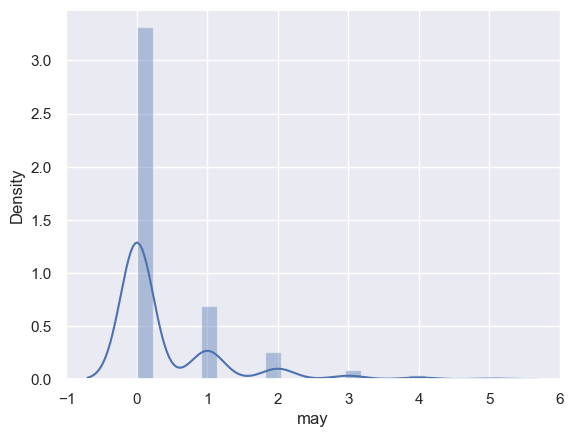

In [11]:
sns.distplot(data_prep['may'])

In [12]:
data = data_prep[data_prep['may']<2.0]

In [13]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3.035662,0.027601,0.280255,0.171975,0.072187,388.019108,0.458599
std,1.852394,0.164000,0.449601,0.377760,0.259072,356.496244,0.498813
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.265000,0.000000,0.000000,0.000000,0.000000,151.000000,0.000000
50%,4.076000,0.000000,0.000000,0.000000,0.000000,266.000000,0.000000
75%,4.959000,0.000000,1.000000,0.000000,0.000000,497.000000,1.000000
max,4.970000,1.000000,1.000000,1.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable

In [16]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot

In [19]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

# Print the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.522965
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  471
Model:                          Logit   Df Residuals:                      469
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                  0.2418
Time:                        13:56:29   Log-Likelihood:                -246.32
converged:                       True   LL-Null:                       -324.86
Covariance Type:            nonrobust   LLR p-value:                 4.920e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9697      0.206     -9.577      0.000      -2.373      -1.567
duration       0.0052      0.001      9.185      0.000       0.004       0.006
==============================================================================
"""

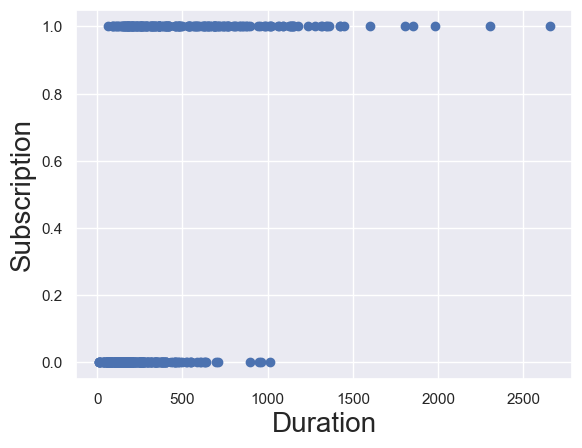

In [20]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y)

# Label the axes
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

## Expand the model

Switch to a multivariate logistic regression model. 
Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [24]:
# To avoid writing inputs out every time
# Save the names of the estimators of our model in a list 
estimators=['interest_rate','credit','march','previous','duration']

X1_all = data[estimators]
y = data['y']

In [25]:
X_all = sm.add_constant(X1_all)
reg_logit = sm.Logit(y,X_all)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.347905
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.496     
Date:               2024-10-09 13:56 AIC:              339.7267  
No. Observations:   471              BIC:              364.6559  
Df Model:           5                Log-Likelihood:   -163.86   
Df Residuals:       465              LL-Null:          -324.86   
Converged:          1.0000           LLR p-value:      1.8727e-67
No. Iterations:     7.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0245   0.3294 -0.0743 0.9408 -0.6701  0.6211
interest_rate     -0.7878   0.0910 -8.6533 0.0000 -0.9662 -0.6094
credit             2.3522   1.0899  2.1582 0.0309  0.2161  4.4882
march             -1.8572   0.3408 -5.4490 0.0000 -2.5253 -1.1892
previous           0.7660   0.5443  1.4072 0.1594 -0.3009  1.8328
duration           0.0069   0.0007  9.3108 0.0000  0.0054  0.0083
=================================================================

"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

In [28]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # Data is a data frame formatted in the same way as your input data
            # Order is very important!
            
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        
        # Specify the bins 
        bins=np.array([0,0.5,1])
        
        # Create a histogram: If values are between 0 and 0.5 they will be considered 0
        # If they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        
        # Return the confusion matrix and accuracy
        return cm, accuracy

In [29]:
# Deploy the function with X_all(Features), y(Actual Values), results_logit(predictions)
confusion_matrix(X_all,y,results_logit)

(array([[218.,  37.],
        [ 32., 184.]]),
 0.8535031847133758)

## Test the model

Load the test data from the 'Bank_data_testing.csv' file

### Load new data 

In [33]:
# Load data our model has never seen before
raw_data2 = pd.read_csv('Bank-data-testing.csv')
data_test = raw_data2.copy()

# Removes the index column
data_test = data_test.drop(['Unnamed: 0'], axis = 1)

In [34]:
# Coverting the outcome variable into 1s and 0s
data_test['y'] = data_test['y'].map({'yes':1, 'no':0})
data_test

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and the independent variables

In [36]:
y_test = data_test['y']

# We already declared a list called 'estimators' 
X1_test = data_test[estimators]
X_test = sm.add_constant(X1_test)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [38]:
# Determine the Confusion Matrix and the Accuracy of the model with the new data 
# Note that the model itself stays the same (results_logit)
# Test accuracy
confusion_matrix(X_test, y_test, results_logit)

(array([[93., 18.],
        [14., 97.]]),
 0.8558558558558559)

In [39]:
# Compare these values to the Confusion Matrix and the accuracy of the model with the old data
# Display training accuracy
confusion_matrix(X_all,y, results_logit)

(array([[218.,  37.],
        [ 32., 184.]]),
 0.8535031847133758)